# Sched Square

This tutorial includes everything you need to set up decision optimization engines, build constraint programming models. 


Table of contents:

-  [Describe the business problem](#Describe-the-business-problem)
*  [How decision optimization (prescriptive analytics) can help](#How--decision-optimization-can-help)
*  [Use decision optimization](#Use-decision-optimization)
    *  [Step 1: Model the Data](#Step-1:-Model-the-data)
    *  [Step 2: Set up the prescriptive model](#Step-2:-Set-up-the-prescriptive-model)
        * [Define the decision variables](#Define-the-decision-variables)
        * [Express the business constraints](#Express-the-business-constraints)
        * [Express the search phase](#Express-the-search-phase)
        * [Solve with Decision Optimization solve service](#Solve-with-Decision-Optimization-solve-service)
    *  [Step 3: Investigate the solution and run an example analysis](#Step-3:-Investigate-the-solution-and-then-run-an-example-analysis)
*  [Summary](#Summary)
****

### Describe the business problem

* The aim of the square example is to place a set of small squares of different sizes into a large square.

*****
## How  decision optimization can help
* Prescriptive analytics technology recommends actions based on desired outcomes, taking into account specific scenarios, resources, and knowledge of past and current events. This insight can help your organization make better decisions and have greater control of business outcomes.  

* Prescriptive analytics is the next step on the path to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes.  

* Prescriptive analytics takes that insight to the next level by suggesting the optimal way to handle that future situation. Organizations that can act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.  
<br/>

+ For example:
    + Automate complex decisions and trade-offs to better manage limited resources.
    + Take advantage of a future opportunity or mitigate a future risk.
    + Proactively update recommendations based on changing events.
    + Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes.


## Use decision optimization

### Step 1: Model the data

In [1]:
from docplex.cp.model import *

Size of the englobing square

In [2]:
SIZE_SQUARE = 112

Sizes of the sub-squares

In [3]:
SIZE_SUBSQUARE = [50, 42, 37, 35, 33, 29, 27, 25, 24, 19, 18, 17, 16, 15, 11, 9, 8, 7, 6, 4, 2]

### Step 2: Set up the prescriptive model

In [4]:
mdl = CpoModel(name="SchedSquare")

#### Define the decision variables
##### Create array of variables for sub-squares

In [5]:
x = []
y = []
rx = pulse((0, 0), 0)
ry = pulse((0, 0), 0)

for i in range(len(SIZE_SUBSQUARE)):
    sq = SIZE_SUBSQUARE[i]
    vx = interval_var(size=sq, name="X" + str(i))
    vx.set_end((0, SIZE_SQUARE))
    x.append(vx)
    rx += pulse(vx, sq)

    vy = interval_var(size=sq, name="Y" + str(i))
    vy.set_end((0, SIZE_SQUARE))
    y.append(vy)
    ry += pulse(vy, sq)

#### Express the business constraints
##### Create dependencies between variables

In [6]:
for i in range(len(SIZE_SUBSQUARE)):
    for j in range(i):
        mdl.add((end_of(x[i]) <= start_of(x[j]))
                | (end_of(x[j]) <= start_of(x[i]))
                | (end_of(y[i]) <= start_of(y[j]))
                | (end_of(y[j]) <= start_of(y[i])))

##### Set other constraints

In [7]:
mdl.add(always_in(rx, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))
mdl.add(always_in(ry, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))

#### Express the search phase

In [8]:
mdl.set_search_phases([search_phase(x), search_phase(y)])

#### Solve with Decision Optimization solve service

In [9]:
msol = mdl.solve(TimeLimit=20)

### Step 3: Investigate the solution and then run an example analysis

#### Print Solution

In [10]:
print("Solution: ")
msol.print_solution()

Solution: 
-------------------------------------------------------------------------------
Model constraints: 212, variables: integer: 0, interval: 42, sequence: 0
Solve status: Feasible, Fail status: SearchHasNotFailed
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 15.22 sec
-------------------------------------------------------------------------------

X0: (start=62, end=112, size=50, length=50)
X1: (start=0, end=42, size=42, length=42)
X2: (start=42, end=79, size=37, length=37)
X3: (start=27, end=62, size=35, length=35)
X4: (start=79, end=112, size=33, length=33)
X5: (start=83, end=112, size=29, length=29)
X6: (start=0, end=27, size=27, length=27)
X7: (start=58, end=83, size=25, length=25)
X8: (start=0, end=24, size=24, length=24)
X9: (start=0, end=19, size=19, length=19)
X10: (start=24, end=42, size=18, length=18)
X11: (start=30, end=47, size=17, length=17)
X12: (start=42, end=58, size=16, length=16)
X13: (start=47, end=62, size=15, length=15)
X14:

#### Import graphical tools

In [11]:
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt

*You can set __POP\_UP\_GRAPHIC=True__ if you prefer a pop up graphic window instead of an inline one.*

In [12]:
POP_UP_GRAPHIC=False

Plotting squares....


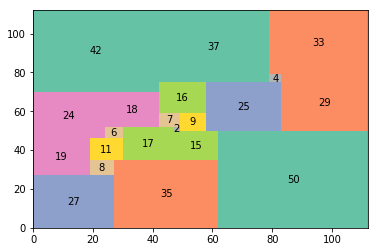

In [13]:
if msol and visu.is_visu_enabled():
    import matplotlib.cm as cm
    from matplotlib.patches import Polygon
    
    if not POP_UP_GRAPHIC:
        %matplotlib inline
    
    # Plot external square
    print("Plotting squares....")
    fig, ax = plt.subplots()
    plt.plot((0, 0), (0, SIZE_SQUARE), (SIZE_SQUARE, SIZE_SQUARE), (SIZE_SQUARE, 0))
    for i in range(len(SIZE_SUBSQUARE)):
        # Display square i
        (sx, sy) = (msol.get_var_solution(x[i]), msol.get_var_solution(y[i]))
        (sx1, sx2, sy1, sy2) = (sx.get_start(), sx.get_end(), sy.get_start(), sy.get_end())
        poly = Polygon([(sx1, sy1), (sx1, sy2), (sx2, sy2), (sx2, sy1)], fc=cm.Set2(float(i) / len(SIZE_SUBSQUARE)))
        ax.add_patch(poly)
        # Display identifier of square i at its center
        ax.text(float(sx1 + sx2) / 2, float(sy1 + sy2) / 2, str(SIZE_SUBSQUARE[i]), ha='center', va='center')
    plt.margins(0)
    plt.show()

## Summary

You have learned how to set up and use the IBM Decision Optimization CPLEX Modeling for Python to formulate and solve a Constraint Programming model.

#### References
* <a href="https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html" target="_blank" rel="noopener noreferrer">Decision Optimization CPLEX Modeling for Python documentation</a>
* <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/welcome-main.html" target="_blank" rel="noopener noreferrer">Watson Studio documentation</a>

<hr>
Copyright © 2017-2019. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>